# Universidad de los Andes - Deep Learning y Redes Neuronales
# Final Project - Movie Genre Classification
-------------------------------
-------------------------------
-------------------------------

### Nicolás Bernal Cod. 201014697

### Felipe Carvajal Cod. 201728562

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline

# Read Data

In [47]:
path = '../datasets/'

In [48]:
dataTraining = pd.read_csv(os.path.join(path, 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [49]:
dataTraining.head()

year                      title  \
3107  2003                       Most   
900   2008  How to Be a Serial Killer   
6724  1941             A Woman's Face   
4704  1954            Executive Suite   
2582  1990              Narrow Margin   

                                                   plot  \
3107  most is the story of a single father who takes...   
900   a serial killer decides to teach the secrets o...   
6724  in sweden ,  a female blackmailer with a disfi...   
4704  in a friday afternoon in new york ,  the presi...   
2582  in los angeles ,  the editor of a publishing h...   

                                  genres  rating  
3107                  ['Short', 'Drama']     8.0  
900        ['Comedy', 'Crime', 'Horror']     5.6  
6724  ['Drama', 'Film-Noir', 'Thriller']     7.2  
4704                           ['Drama']     7.4  
2582     ['Action', 'Crime', 'Thriller']     6.6

In [50]:
dataTesting.head()

year                title  \
1  1999  Message in a Bottle   
4  1978     Midnight Express   
5  1996          Primal Fear   
6  1950               Crisis   
7  1959          The Tingler   

                                                plot  
1  who meets by fate ,  shall be sealed by fate ....  
4  the true story of billy hayes ,  an american c...  
5  martin vail left the chicago da ' s office to ...  
6  husband and wife americans dr .  eugene and mr...  
7  the coroner and scientist dr .  warren chapin ...

# Read Images

In [6]:
image = io.imread(os.path.join(path,'images_resize_gray', str(dataTraining.index[0]) + '_resize_gray.jpeg'))

In [7]:
image[0].shape

(160,)

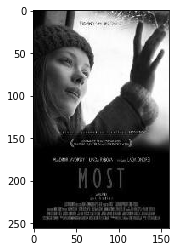

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.imshow(image, cmap='gray')

Read all images

In [9]:
images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

100%|█████████████████████████████████████████████████████████████████████████████| 7895/7895 [00:12<00:00, 629.95it/s]


In [10]:
images_training = np.stack(images_training)
images_training.shape, dataTraining.shape[0]

((7895, 40960), 7895)

In [11]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

100%|█████████████████████████████████████████████████████████████████████████████| 3383/3383 [00:05<00:00, 634.55it/s]


In [12]:
images_testing = np.stack(images_testing)
images_testing.shape, dataTesting.shape[0]

((3383, 40960), 3383)

# Apply PCA

In [13]:
pca = PCA(n_components=32)
images_training_pca = pca.fit_transform(images_training)

In [14]:
pca

PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
images_testing_pca = pca.transform(images_testing)

# Create y

In [16]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [17]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(images_training_pca, y_genres, test_size=0.30, random_state=42)

# Train multi-class multi-label model

In [18]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, criterion='entropy', max_depth=10, random_state=42))

In [19]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

In [20]:
y_pred_genres = clf.predict_proba(X_test)

In [21]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.6005609235760118

# Apply model to kaggle test

In [22]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = clf.predict_proba(images_testing_pca)
pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_RF.csv', index_label='ID')

-------------------------------
-------------------------------

# Image Classification Model

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import io
from tqdm import tqdm
import os
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.applications import VGG16
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from skimage.transform import resize

C:\Users\felip\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Read Images

In [78]:
path = '../datasets/'

In [79]:
dataTraining = pd.read_csv(os.path.join(path, 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [80]:
images_training = []
for i in tqdm(dataTraining.index):
    images_training.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

100%|█████████████████████████████████████████████████████████████████████████████| 7895/7895 [00:13<00:00, 607.18it/s]


In [81]:
images_training = np.stack(images_training)
images_training.shape, dataTraining.shape[0]

((7895, 40960), 7895)

In [82]:
images_testing = []
for i in tqdm(dataTesting.index):
    images_testing.append(io.imread(os.path.join(path, 'images_resize_gray', str(i) + '_resize_gray.jpeg')).flatten())

100%|█████████████████████████████████████████████████████████████████████████████| 3383/3383 [00:05<00:00, 630.83it/s]


In [83]:
images_testing = np.stack(images_testing)
images_testing.shape, dataTesting.shape[0]

((3383, 40960), 3383)

## Extract features with VGG16

In [84]:
def apply_pre_grayscale(images):

    images_ = []
    for img in tqdm(images):
        img = img.reshape((256, 160))
        img = resize(img, (224, 224), mode='reflect', anti_aliasing=False)
        img = [img] * 3

        images_.append(img)

    images_ = np.array(images_)
    images_ = np.rollaxis(images_, 1, 4)
    
    return images_

In [85]:
images_training_ = apply_pre_grayscale(images_training)

100%|█████████████████████████████████████████████████████████████████████████████| 7895/7895 [00:24<00:00, 322.90it/s]


In [86]:
images_testing_ = apply_pre_grayscale(images_testing)

100%|█████████████████████████████████████████████████████████████████████████████| 3383/3383 [00:13<00:00, 247.55it/s]


In [87]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [88]:
model_VGG16 = VGG16(weights='imagenet', include_top=False)
model_VGG16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

    # Pre training model

In [89]:
X_train_VGG16 = model_VGG16.predict(images_training_)
X_train_VGG16.shape

(7895, 7, 7, 512)

In [90]:
X_test_VGG16 = model_VGG16.predict(images_testing_)
X_test_VGG16.shape

(3383, 7, 7, 512)

    # Pre training model + Model 1
    

In [115]:
model1 = Sequential()

model1.add(Flatten(input_shape=(7,7,512)))
model1.add(Dense(512))
model1.add(Activation('relu'))

model1.add(Dropout(0.5))
model1.add(Dense(24))
model1.add(Activation('sigmoid'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               12845568  
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                12312     
_________________________________________________________________
activation_2 (Activation)    (None, 24)                0         
Total params: 12,857,880
Trainable params: 12,857,880
Non-trainable params: 0
________________________________________________________________

    # model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [118]:
model1.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [119]:
model1.fit(X_train_VGG16, y_genres, epochs=50, verbose=2)

Epoch 1/50
 - 37s - loss: 0.3961 - acc: 0.8616
Epoch 2/50
 - 41s - loss: 0.3109 - acc: 0.8885
Epoch 3/50
 - 44s - loss: 0.3003 - acc: 0.8907
Epoch 4/50
 - 43s - loss: 0.2949 - acc: 0.8922
Epoch 5/50
 - 49s - loss: 0.2895 - acc: 0.8926
Epoch 6/50
 - 48s - loss: 0.2851 - acc: 0.8940
Epoch 7/50
 - 44s - loss: 0.2804 - acc: 0.8951
Epoch 8/50
 - 44s - loss: 0.2786 - acc: 0.8963
Epoch 9/50
 - 45s - loss: 0.2745 - acc: 0.8970
Epoch 10/50
 - 49s - loss: 0.2699 - acc: 0.8979
Epoch 11/50
 - 52s - loss: 0.2650 - acc: 0.8992
Epoch 12/50
 - 49s - loss: 0.2637 - acc: 0.8994
Epoch 13/50
 - 52s - loss: 0.2620 - acc: 0.8999
Epoch 14/50
 - 48s - loss: 0.2591 - acc: 0.9006
Epoch 15/50
 - 46s - loss: 0.2538 - acc: 0.9017
Epoch 16/50
 - 51s - loss: 0.2518 - acc: 0.9025
Epoch 17/50
 - 48s - loss: 0.2510 - acc: 0.9024
Epoch 18/50
 - 53s - loss: 0.2460 - acc: 0.9035
Epoch 19/50
 - 48s - loss: 0.2478 - acc: 0.9038
Epoch 20/50
 - 45s - loss: 0.2440 - acc: 0.9041
Epoch 21/50
 - 44s - loss: 0.2430 - acc: 0.9046
E

# Apply model to kaggle test

In [120]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres =  model1.predict_proba(X_test_VGG16)
pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_m1.csv', index_label='ID')

    # Pre training model + Model 2

In [91]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [110]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=(7,7,512)))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(24, activation='sigmoid'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 5, 5, 32)          147488    
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
__________

In [111]:
model2.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [112]:
model2.fit(X_train_VGG16, y_genres, epochs=50, verbose=2)

Epoch 1/50
 - 8s - loss: 0.3472 - acc: 0.8645
Epoch 2/50
 - 6s - loss: 0.2994 - acc: 0.8868
Epoch 3/50
 - 6s - loss: 0.2904 - acc: 0.8895
Epoch 4/50
 - 6s - loss: 0.2847 - acc: 0.8910
Epoch 5/50
 - 6s - loss: 0.2805 - acc: 0.8927
Epoch 6/50
 - 6s - loss: 0.2776 - acc: 0.8936
Epoch 7/50
 - 6s - loss: 0.2741 - acc: 0.8945
Epoch 8/50
 - 6s - loss: 0.2706 - acc: 0.8956
Epoch 9/50
 - 6s - loss: 0.2698 - acc: 0.8957
Epoch 10/50
 - 6s - loss: 0.2671 - acc: 0.8962
Epoch 11/50
 - 6s - loss: 0.2646 - acc: 0.8976
Epoch 12/50
 - 6s - loss: 0.2630 - acc: 0.8977
Epoch 13/50
 - 6s - loss: 0.2611 - acc: 0.8984
Epoch 14/50
 - 6s - loss: 0.2592 - acc: 0.8994
Epoch 15/50
 - 6s - loss: 0.2570 - acc: 0.8999
Epoch 16/50
 - 6s - loss: 0.2551 - acc: 0.9005
Epoch 17/50
 - 6s - loss: 0.2543 - acc: 0.9006
Epoch 18/50
 - 6s - loss: 0.2519 - acc: 0.9011
Epoch 19/50
 - 6s - loss: 0.2503 - acc: 0.9022
Epoch 20/50
 - 6s - loss: 0.2489 - acc: 0.9022
Epoch 21/50
 - 6s - loss: 0.2469 - acc: 0.9028
Epoch 22/50
 - 6s - lo

# Apply model to kaggle test

In [114]:
cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres =  model2.predict_proba(X_test_VGG16)
pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_img_m2.csv', index_label='ID')

-------------------------------
-------------------------------

    # def show_example(idx):
        N_true = int(np.sum(y_test[idx]))
        show_img(ids[n + idx])
        print("Prediction: {}".format("|".join(["{} ({:.3})".format(label_dict["idx2word"][s],y_pred_test_genres[idx][s])
                                            for s in y_pred_test_genres[idx].argsort()[-N_true:][::-1]])))
                                       
     # show_example(3)

-------------------------------
-------------------------------


# Text Recognition

# Read Data

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
path = '../datasets/'

In [3]:
dataTraining = pd.read_csv(os.path.join(path, 'dataTraining.csv'), encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv(os.path.join(path, 'dataTesting.csv'), encoding='UTF-8', index_col=0)

In [4]:
dataTraining.head()

year                      title  \
3107  2003                       Most   
900   2008  How to Be a Serial Killer   
6724  1941             A Woman's Face   
4704  1954            Executive Suite   
2582  1990              Narrow Margin   

                                                   plot  \
3107  most is the story of a single father who takes...   
900   a serial killer decides to teach the secrets o...   
6724  in sweden ,  a female blackmailer with a disfi...   
4704  in a friday afternoon in new york ,  the presi...   
2582  in los angeles ,  the editor of a publishing h...   

                                  genres  rating  
3107                  ['Short', 'Drama']     8.0  
900        ['Comedy', 'Crime', 'Horror']     5.6  
6724  ['Drama', 'Film-Noir', 'Thriller']     7.2  
4704                           ['Drama']     7.4  
2582     ['Action', 'Crime', 'Thriller']     6.6

In [5]:
vect = CountVectorizer(ngram_range=(1, 2), max_features=1000)
X_dtm = vect.fit_transform(dataTraining['plot'])
X_dtm.shape

(7895, 1000)

In [6]:
print(vect.get_feature_names()[:50])

['able', 'able to', 'about', 'about the', 'about to', 'accident', 'across', 'act', 'action', 'actually', 'affair', 'after', 'after the', 'again', 'against', 'against the', 'age', 'agent', 'ago', 'alex', 'alive', 'all', 'all of', 'all the', 'alone', 'along', 'along the', 'along with', 'already', 'also', 'although', 'always', 'america', 'american', 'among', 'an', 'an old', 'and', 'and has', 'and he', 'and her', 'and his', 'and is', 'and she', 'and that', 'and the', 'and their', 'and then', 'and they', 'and when']


## Create y

In [7]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

In [8]:
y_genres.shape

(7895, 24)

In [9]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.30, random_state=42)

-------------------------------
-------------------------------
-------------------------------

# Machine Learning Model
# knn Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_dtm, y_genres)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
knn_predicted = knn.predict_proba(X_test)

-------------------------------
-------------------------------

# Train multi-class multi-label model

In [89]:
clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=100, max_depth=10, random_state=42))

In [90]:
clf.fit(X_train, y_train_genres)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          n_jobs=1)

In [91]:
y_pred_genres = clf.predict_proba(X_test)

In [92]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7664397813202131

# Apply model to kaggle test

In [93]:
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = clf.predict_proba(X_test_dtm)
pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_text_RF.csv', index_label='ID')

-------------------------------
-------------------------------


# Deep Neural Network

In [34]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [35]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import History
from livelossplot import PlotLossesKeras

C:\Users\felip\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [36]:
vect = CountVectorizer()
X_dtm = vect.fit_transform(dataTraining['plot'])

In [37]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.30, random_state=42)

In [38]:
model = Sequential()

model.add(Dense(128, input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(24))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               4950144   
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
activation_2 (Activation)    (None, 24)                0         
Total params: 4,953,752
Trainable params: 4,953,496
Non-trainable params: 256
________________________________________________________________

    # model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [39]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train_genres, epochs=50, verbose=2)

Epoch 1/50
 - 12s - loss: 0.5017 - acc: 0.7732
Epoch 2/50
 - 11s - loss: 0.2391 - acc: 0.9083
Epoch 3/50
 - 11s - loss: 0.2026 - acc: 0.9209
Epoch 4/50
 - 11s - loss: 0.1775 - acc: 0.9313
Epoch 5/50
 - 11s - loss: 0.1619 - acc: 0.9371
Epoch 6/50
 - 11s - loss: 0.1501 - acc: 0.9416
Epoch 7/50
 - 11s - loss: 0.1418 - acc: 0.9449
Epoch 8/50
 - 11s - loss: 0.1349 - acc: 0.9480
Epoch 9/50
 - 12s - loss: 0.1310 - acc: 0.9489
Epoch 10/50
 - 11s - loss: 0.1217 - acc: 0.9523
Epoch 11/50
 - 12s - loss: 0.1199 - acc: 0.9533
Epoch 12/50
 - 11s - loss: 0.1134 - acc: 0.9553
Epoch 13/50
 - 11s - loss: 0.1122 - acc: 0.9563
Epoch 14/50
 - 12s - loss: 0.1116 - acc: 0.9567
Epoch 15/50
 - 13s - loss: 0.1071 - acc: 0.9585
Epoch 16/50
 - 13s - loss: 0.1043 - acc: 0.9591
Epoch 17/50
 - 14s - loss: 0.1023 - acc: 0.9608
Epoch 18/50
 - 11s - loss: 0.0994 - acc: 0.9617
Epoch 19/50
 - 12s - loss: 0.0968 - acc: 0.9623
Epoch 20/50
 - 13s - loss: 0.0965 - acc: 0.9626
Epoch 21/50
 - 12s - loss: 0.0955 - acc: 0.9627
E

In [41]:
y_pred_genres = model.predict_proba(X_test)

In [42]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.837995951728082

In [124]:
# 1st model
# roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.7946380801012062

# Apply model to kaggle test

In [43]:
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = model.predict_proba(X_test_dtm)
pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols).to_csv('pred_genres_text_m1.csv', index_label='ID')

-------------------------------
-------------------------------